<a href="https://colab.research.google.com/github/phycoding/LGMVIP-DataScience/blob/main/LGM_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def show_image(index):
  plt.imshow(x_train[index],cmap='gray')
  plt.axis('off')
  plt.title(y_train[index])

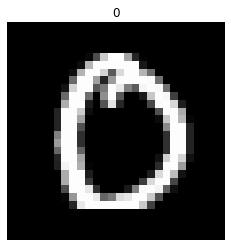

In [ ]:
show_image(88)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(28,kernel_size=(3,3),input_shape = input_shape),
                                 keras.layers.MaxPooling2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128,activation='relu'),
                                 keras.layers.Dense(10,activation = 'softmax')
])

In [ ]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0041 - accuracy: 0.9988
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0027 - accuracy: 0.9991
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0055 - accuracy: 0.9986
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0032 - accuracy: 0.9989
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9990
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 0.9990
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0034 - accuracy: 0.9991
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.005

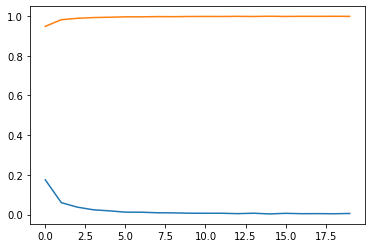

In [ ]:
import pandas as pd
plt.plot(pd.DataFrame(model.history.history))

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1064 - accuracy: 0.9839


[0.10638100653886795, 0.9839000105857849]

In [ ]:
model.save("/content/drive/MyDrive/Datasets_LGM/My_models_Handwriting")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Datasets_LGM/My_models_Handwriting/assets


In [ ]:
np.argmax(model.predict(x_test[0].reshape(1,28,28,1)))

7

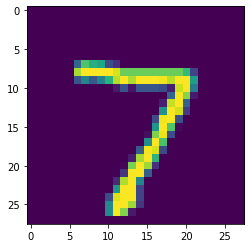

In [ ]:
plt.imshow(x_test[0].reshape(28,28))

In [ ]:
model = keras.models.load_model("/content/drive/MyDrive/Datasets_LGM/My_models_Handwriting")

In [ ]:
model.save("my_model.h5")

In [ ]:
from google.colab import files
files.download("my_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>